In [1]:
import pandas as pd

# Load the E-Commerce Dataset
eCommerce_data = pd.read_excel('../data/raw/E Commerce Dataset.xlsx')

eCommerce_data

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [2]:
ecommerce_data_cleaned = eCommerce_data.copy()

# Assuming impossible values based on common sense and data understanding.
# Removing impossible values, for example, negative values in numerical columns that should only have positive values.
for column in ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']:
    ecommerce_data_cleaned = ecommerce_data_cleaned[ecommerce_data_cleaned[column] >= 0]

# Removing CustomerID duplicates, if any.
ecommerce_data_cleaned = ecommerce_data_cleaned.drop_duplicates(subset=['CustomerID'])

# Saving the partially cleaned data to an Excel file
ecommerce_data_cleaned.to_excel('../data/interim/ecomerce_data_partial_clean.xlsx', index=False)

The dataset has been partially cleaned by removing impossible values, such as negative numbers in columns where only positive values are expected, and by removing duplicate records based on `CustomerID`. This cleaned version has been saved as "ecomerce_data_partial_clean.xlsx".

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


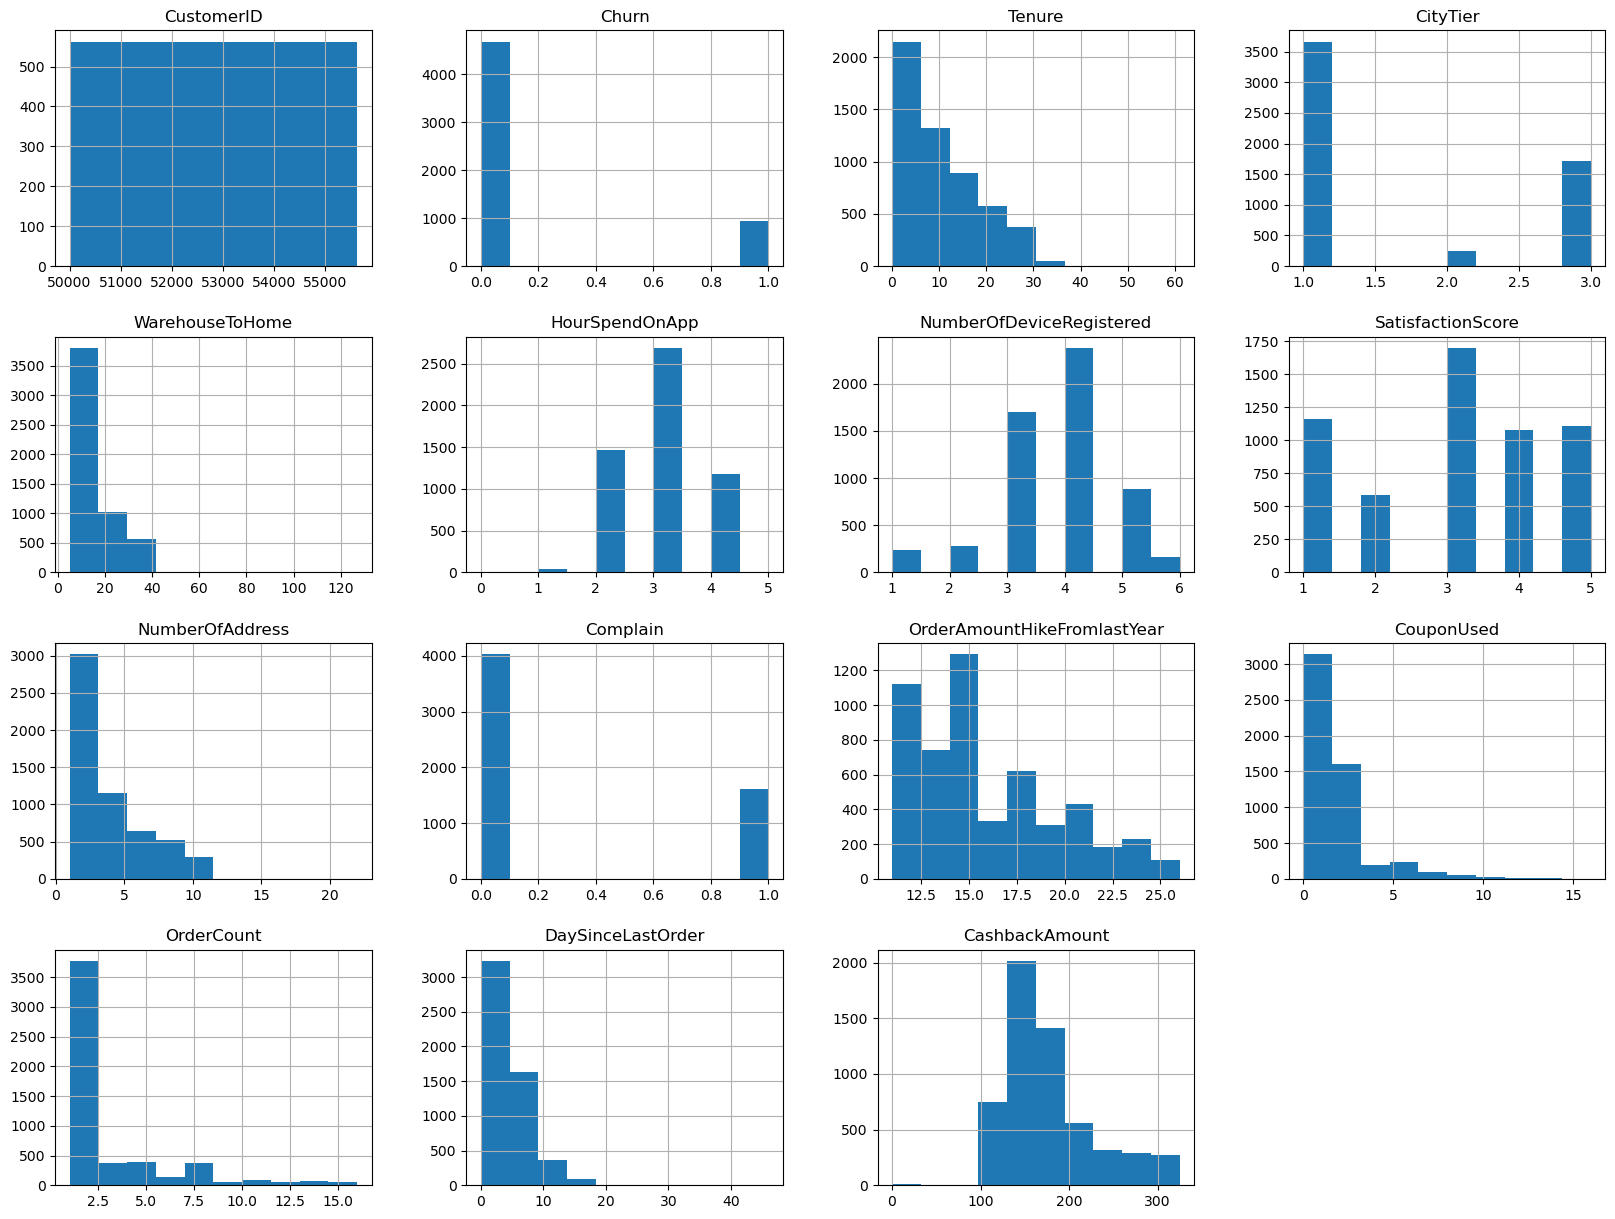

In [3]:
# Summary statistics and distributions for numerical columns
descriptive_stats = eCommerce_data.describe()
histograms = eCommerce_data.hist(figsize=(20,15))

descriptive_stats

 **Summary Statistics and Distributions**: The summary statistics reveal various aspects of the data, such as the average tenure being approximately 10 units, and the `CashbackAmount` showing a mean of around 177. The histograms plotted for numeric columns provide insights into distributions, for example, the distribution of `Tenure` or `CashbackAmount`.

<Axes: >

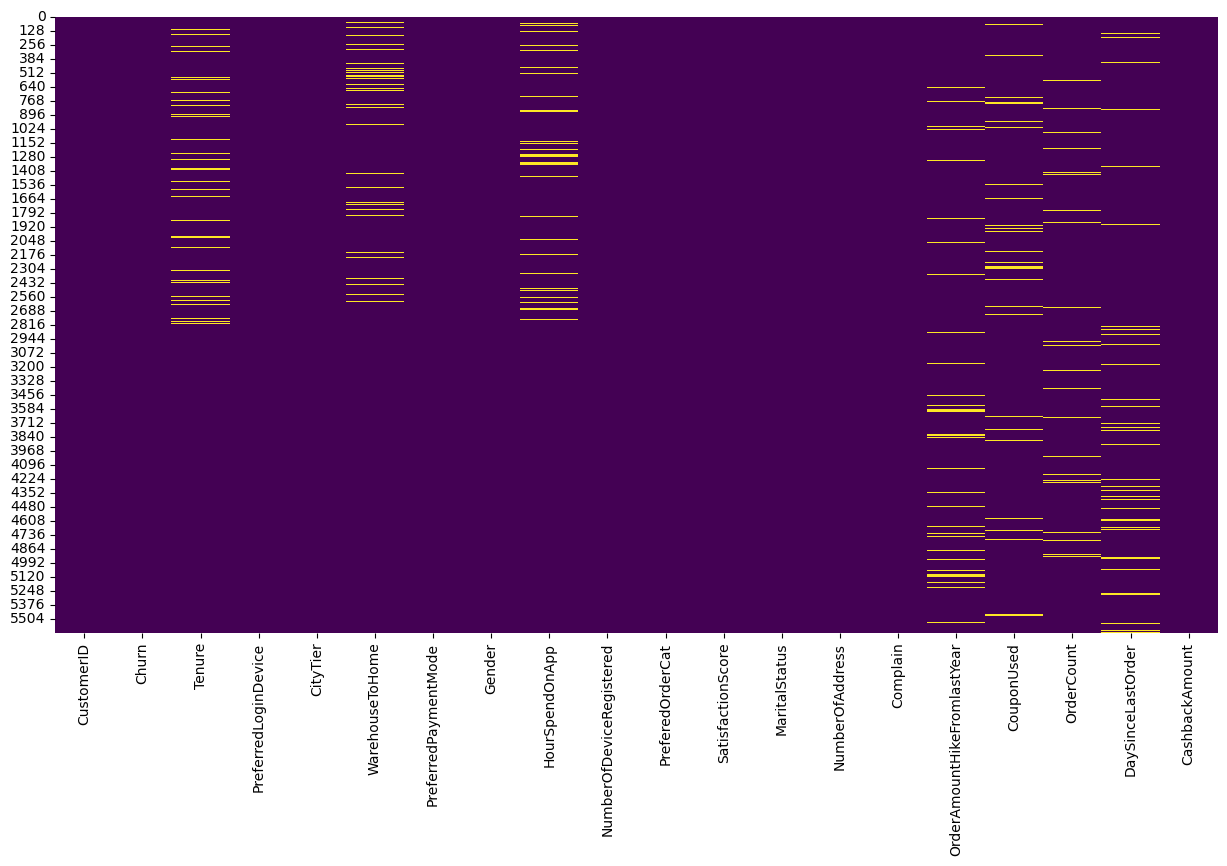

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
sns.heatmap(eCommerce_data.isnull(), cbar=False, cmap='viridis')

**Handling Missing Values**: A heatmap visualizing missing values across the dataset confirms the presence of missing data in several columns, such as `Tenure`, `WarehouseToHome`, `HourSpendOnApp`, `OrderAmountHikeFromlastYear`, `CouponUsed`, `OrderCount`, and `DaySinceLastOrder`. 

In [5]:
# Categorical Data Analysis

# Count of unique values for categorical features
categorical_unique_counts = eCommerce_data.select_dtypes(include=['object', 'category']).nunique()

# Display unique values for each categorical column
categorical_unique_values = {column: eCommerce_data[column].unique() for column in eCommerce_data.select_dtypes(include=['object', 'category']).columns}

(categorical_unique_counts, categorical_unique_values)

(PreferredLoginDevice    3
 PreferredPaymentMode    7
 Gender                  2
 PreferedOrderCat        6
 MaritalStatus           3
 dtype: int64,
 {'PreferredLoginDevice': array(['Mobile Phone', 'Phone', 'Computer'], dtype=object),
  'PreferredPaymentMode': array(['Debit Card', 'UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD',
         'Credit Card'], dtype=object),
  'Gender': array(['Female', 'Male'], dtype=object),
  'PreferedOrderCat': array(['Laptop & Accessory', 'Mobile', 'Mobile Phone', 'Others',
         'Fashion', 'Grocery'], dtype=object),
  'MaritalStatus': array(['Single', 'Divorced', 'Married'], dtype=object)})

**Categorical Data Analysis**: The unique counts for categorical variables indicate a limited number of unique values for each, such as three possible devices for `PreferredLoginDevice` and seven payment modes in `PreferredPaymentMode`. The detailed list of unique values for each categorical variable provides insight into the diverse preferences among the customers, including their preferred login devices, payment modes, gender, preferred order categories, and marital status.

<Axes: >

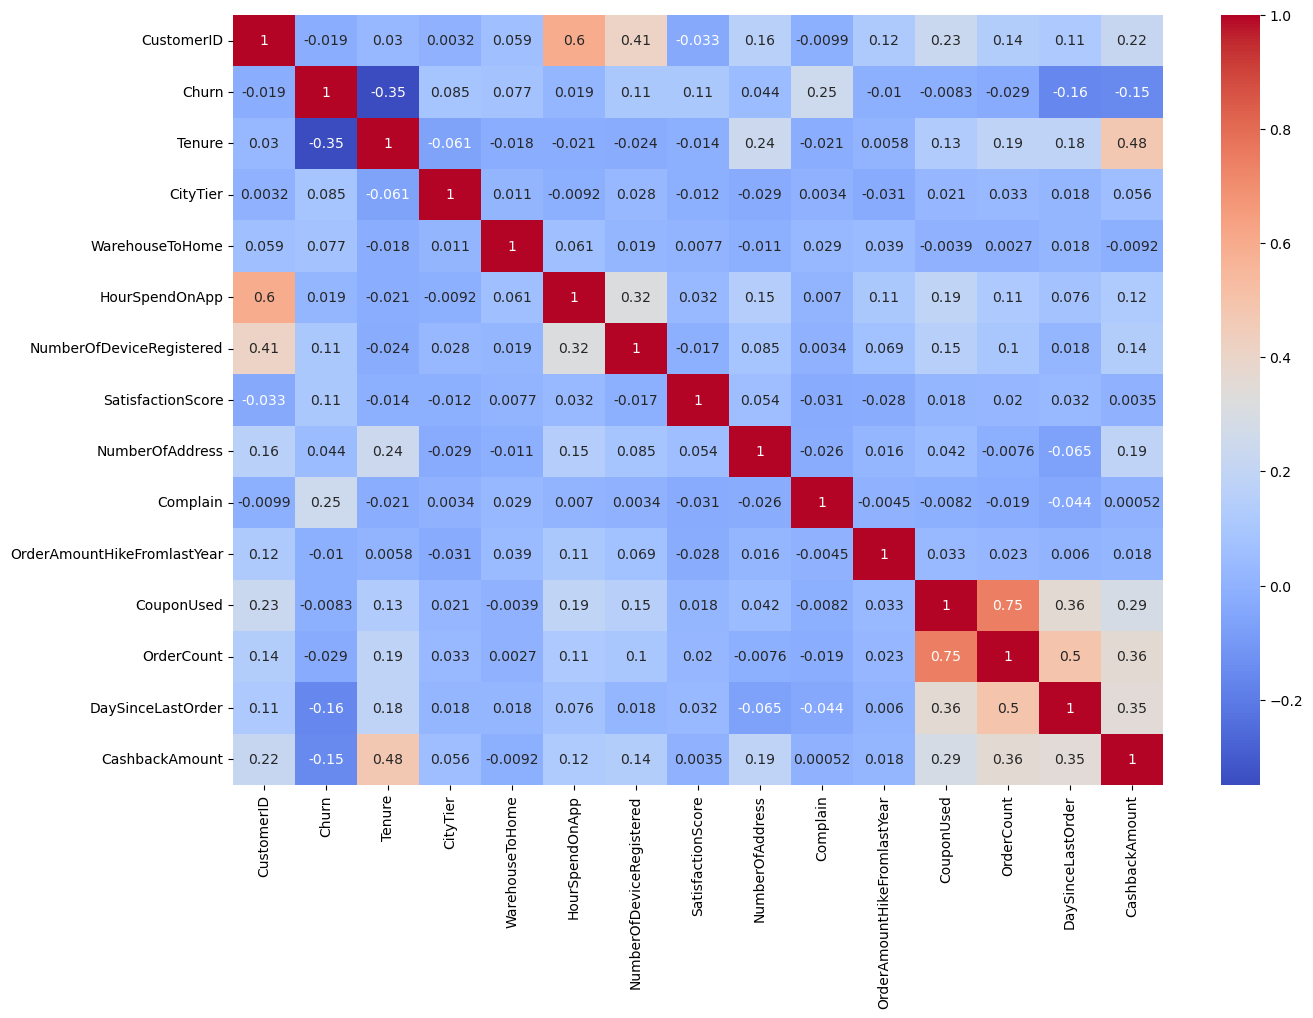

In [6]:
# Correlation Analysis
import numpy as np
# Dropping or encoding non-numeric columns before correlation analysis
numeric_data = eCommerce_data.select_dtypes(include=[np.number])
plt.figure(figsize=(15, 10))
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')


The correlation analysis intended to understand how different numeric features relate to each other and the churn label could not be performed directly due to the presence of non-numeric (categorical) columns. To overcome this, categorical columns would need to be encoded numerically or removed from the analysis. 